<a href="https://colab.research.google.com/github/Ganeshprasannamax/Task_5_6_7/blob/main/Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [64]:
df = pd.read_csv("car_data.csv")

##Task

In [65]:
df = pd.read_csv("car_data.csv")

In [66]:
df.shape

(804, 12)

In [67]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [68]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [69]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [70]:
df.drop_duplicates()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,16229,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,0,0
800,16175.957604,19095,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
801,15731.132897,20484,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0
802,15118.893228,25979,Saturn,L Series,L300 Sedan 4D,Sedan,6,3.0,4,1,1,0


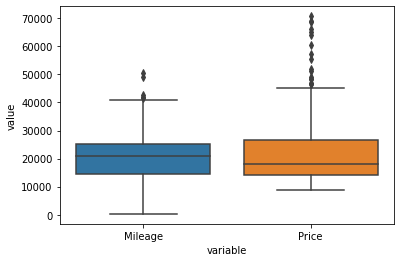

In [71]:
import seaborn as sns

df = pd.DataFrame(data = df, columns = ['Mileage','Price'])
sns.boxplot(x="variable", y="value",data=pd.melt(df))
plt.show()


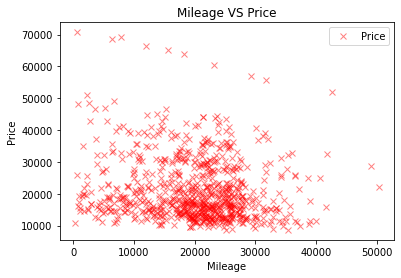

In [72]:
df.plot(x='Mileage',y='Price',style='x',color='red',alpha=0.5)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Mileage VS Price")
plt.show()

In [73]:
df[['Mileage','Price']].corr()

,Mileage,Price
Mileage,1.000000,-0.143051
Price,-0.143051,1.000000


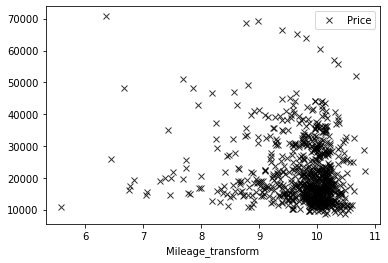

In [74]:
df['Mileage_transform'] = np.log(df['Mileage'])
df.plot(x='Mileage_transform',y='Price',style='x',color='k',alpha=0.8)
plt.show()

# **Tasks - Part 1**

**1.Find the linear regression equation for mileage vs price**

In [75]:
X = df[['Mileage']].values
y = df['Price'].values

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [76]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [77]:
print("Linear Regression equation : y = {:.3f} x + {:.3f}".format(lr.coef_[0],lr.intercept_))


Linear Regression equation : y = -0.189 x + 24950.672


**2.Chart the original data and the equation on the chart.**

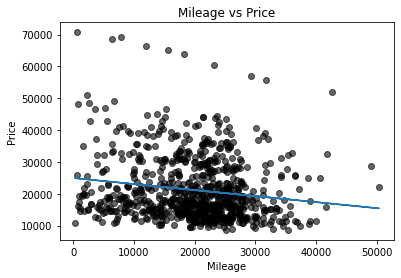

In [78]:
plt.scatter(X,y,color='k',alpha=0.6)
plt.plot(X, lr.predict(X))
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')
plt.show()

**3.Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)**

In [79]:
from sklearn import metrics

y_predict = lr.predict(X_test)
print("R2 Score :", metrics.r2_score(y_test,y_predict))


R2 Score : 0.008431468965738986


**R2 Score-5.78625**

# **Tasks-  Part 2**

**1.Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.**

In [80]:
X = df[['Mileage']]
y = df['Price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)



In [81]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [82]:
print('Linear Regression Equation: y={:.3f} X + {:.3f}'.format(lr.coef_[0],lr.intercept_) )

Linear Regression Equation: y=-0.189 X + 24950.672


**2.Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)**

In [83]:
y_predict = lr.predict(X_test_scaled)
print("R2 Score :", metrics.r2_score(y_test,y_predict))

R2 Score : -0.1897246746294643


**3.Find the combination of the factors that is the best predictor for price.**

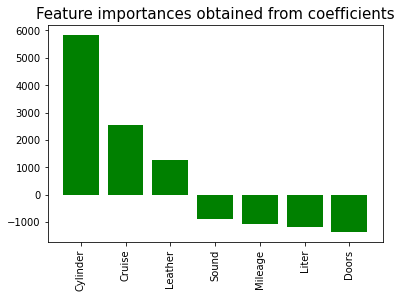

In [84]:
data={'Attribute': ['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather'],
    'Importance': [-1083.51949546,  5844.05042523, -1171.72086432, -1381.19724291,
        2553.49235807,  -895.06576058,  1252.05872321]}
importances = pd.DataFrame(data)
importances = importances.sort_values(by='Importance', ascending=False)
# Visualization
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='green')
plt.title('Feature importances obtained from coefficients', size=15)
plt.xticks(rotation='vertical')
plt.show()

In [85]:
def combinations(F):
  if F:
    result = combinations(F[:-1])
    return result + [i+[F[-1]] for i in result]
  else:
    return [[]]
comb = combinations (['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather'])
comb = comb[1:]
print(comb)

[['Mileage'], ['Cylinder'], ['Mileage', 'Cylinder'], ['Liter'], ['Mileage', 'Liter'], ['Cylinder', 'Liter'], ['Mileage', 'Cylinder', 'Liter'], ['Doors'], ['Mileage', 'Doors'], ['Cylinder', 'Doors'], ['Mileage', 'Cylinder', 'Doors'], ['Liter', 'Doors'], ['Mileage', 'Liter', 'Doors'], ['Cylinder', 'Liter', 'Doors'], ['Mileage', 'Cylinder', 'Liter', 'Doors'], ['Cruise'], ['Mileage', 'Cruise'], ['Cylinder', 'Cruise'], ['Mileage', 'Cylinder', 'Cruise'], ['Liter', 'Cruise'], ['Mileage', 'Liter', 'Cruise'], ['Cylinder', 'Liter', 'Cruise'], ['Mileage', 'Cylinder', 'Liter', 'Cruise'], ['Doors', 'Cruise'], ['Mileage', 'Doors', 'Cruise'], ['Cylinder', 'Doors', 'Cruise'], ['Mileage', 'Cylinder', 'Doors', 'Cruise'], ['Liter', 'Doors', 'Cruise'], ['Mileage', 'Liter', 'Doors', 'Cruise'], ['Cylinder', 'Liter', 'Doors', 'Cruise'], ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise'], ['Sound'], ['Mileage', 'Sound'], ['Cylinder', 'Sound'], ['Mileage', 'Cylinder', 'Sound'], ['Liter', 'Sound'], ['Mileage',

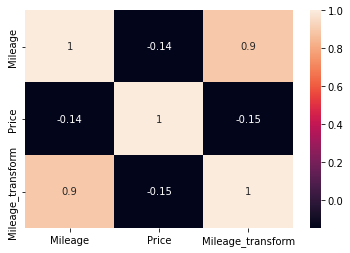

In [86]:

df2=sns.heatmap(df.corr(),annot=True)
df2

# **Task - Hard Mode**

**1.Research dummy variables in scikit-learn to see how to use the make, model, and body type.**

In [87]:
data = pd.read_csv("car_data.csv",usecols=['Price','Make','Model','Trim','Type'])


In [88]:
data.head()

,Price,Make,Model,Trim,Type
0,17314.103129,Buick,Century,Sedan 4D,Sedan
1,17542.036083,Buick,Century,Sedan 4D,Sedan
2,16218.847862,Buick,Century,Sedan 4D,Sedan
3,16336.913140,Buick,Century,Sedan 4D,Sedan
4,16339.170324,Buick,Century,Sedan 4D,Sedan


In [89]:
dummies = pd.get_dummies(data[['Make','Model','Trim','Type']])
dummies

,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9-2X AWD,Model_9_3,Model_9_3 HO,Model_9_5,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [90]:
merged = pd.concat([data,dummies],axis='columns')
merged

,Price,Make,Model,Trim,Type,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,Buick,Century,Sedan 4D,Sedan,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,17542.036083,Buick,Century,Sedan 4D,Sedan,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,16218.847862,Buick,Century,Sedan 4D,Sedan,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,16336.913140,Buick,Century,Sedan 4D,Sedan,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,16339.170324,Buick,Century,Sedan 4D,Sedan,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,Saturn,L Series,L300 Sedan 4D,Sedan,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,Saturn,L Series,L300 Sedan 4D,Sedan,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,Saturn,L Series,L300 Sedan 4D,Sedan,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,Saturn,L Series,L300 Sedan 4D,Sedan,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [91]:
final = merged.drop(['Make','Model','Trim','Type'],axis='columns')
final

,Price,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9-2X AWD,Model_9_3,Model_9_3 HO,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.103129,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,17542.036083,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,16218.847862,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,16336.913140,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,16339.170324,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.070267,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,16175.957604,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,15731.132897,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,15118.893228,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [92]:
X = final.drop('Price',axis='columns')
X

,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Model_9-2X AWD,Model_9_3,Model_9_3 HO,Model_9_5,...,Trim_SVM Hatchback 4D,Trim_SVM Sedan 4D,Trim_Sedan 4D,Trim_Special Ed Ultra 4D,Trim_Sportwagon 4D,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
801,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
802,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [93]:
y = final['Price']
y

0      17314.103129
1      17542.036083
2      16218.847862
3      16336.913140
4      16339.170324
           ...     
799    16507.070267
800    16175.957604
801    15731.132897
802    15118.893228
803    13585.636802
Name: Price, Length: 804, dtype: float64

In [94]:
y_predict = lr.predict(X_test_scaled)
print("R2 Score :", metrics.r2_score(y_test,y_predict))

R2 Score : -0.1897246746294643


**2.Find the best combination of factors to predict price.**

In [95]:
dff = pd.read_csv('car_data.csv')
to_encode = ['Make','Model','Type','Trim']

In [96]:
def combinations(Ft):
  if Ft:
    result = combinations(Ft[:-1])
    return result + [i+[Ft[-1]] for i in result]
  else:
    return [[]]
comb = combinations(['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather','Make','Model','Trim','Type'])
comb = comb[1:]
print(comb)


[['Mileage'], ['Cylinder'], ['Mileage', 'Cylinder'], ['Liter'], ['Mileage', 'Liter'], ['Cylinder', 'Liter'], ['Mileage', 'Cylinder', 'Liter'], ['Doors'], ['Mileage', 'Doors'], ['Cylinder', 'Doors'], ['Mileage', 'Cylinder', 'Doors'], ['Liter', 'Doors'], ['Mileage', 'Liter', 'Doors'], ['Cylinder', 'Liter', 'Doors'], ['Mileage', 'Cylinder', 'Liter', 'Doors'], ['Cruise'], ['Mileage', 'Cruise'], ['Cylinder', 'Cruise'], ['Mileage', 'Cylinder', 'Cruise'], ['Liter', 'Cruise'], ['Mileage', 'Liter', 'Cruise'], ['Cylinder', 'Liter', 'Cruise'], ['Mileage', 'Cylinder', 'Liter', 'Cruise'], ['Doors', 'Cruise'], ['Mileage', 'Doors', 'Cruise'], ['Cylinder', 'Doors', 'Cruise'], ['Mileage', 'Cylinder', 'Doors', 'Cruise'], ['Liter', 'Doors', 'Cruise'], ['Mileage', 'Liter', 'Doors', 'Cruise'], ['Cylinder', 'Liter', 'Doors', 'Cruise'], ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise'], ['Sound'], ['Mileage', 'Sound'], ['Cylinder', 'Sound'], ['Mileage', 'Cylinder', 'Sound'], ['Liter', 'Sound'], ['Mileage',

In [97]:
import time 
start = time.time()
R2_Score = []
for i in comb:
  X = dff[i]
  y = dff['Price'].values
  X = pd.get_dummies(X,columns=[j for j in to_encode if j in X.columns])
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=20)

  if 'Mileage' in X_train:
    ss = StandardScaler()
    ss.fit(X_train)
    X_train_scaled = ss.transform(X_train) 
    X_test_scaled = ss.transform(X_test)
  lr = LinearRegression()
  lr.fit(X_train_scaled,y_train)
  y_predict = lr.predict(X_test_scaled)
  R2_Score.append(metrics.r2_score(y_test,y_predict))
  end=time.time()

In [98]:
df = pd.DataFrame({'Feature Combination':comb,'R2 Score':R2_Score})
df

,Feature Combination,R2 Score
0,[Mileage],0.039431
1,[Cylinder],0.039431
2,"[Mileage, Cylinder]",0.298457
3,[Liter],0.298457
4,"[Mileage, Liter]",0.309513
...,...,...
2042,"[Mileage, Cylinder, Doors, Cruise, Sound, Leat...",0.991644
2043,"[Liter, Doors, Cruise, Sound, Leather, Make, M...",0.991644
2044,"[Mileage, Liter, Doors, Cruise, Sound, Leather...",0.991542
2045,"[Cylinder, Liter, Doors, Cruise, Sound, Leathe...",0.991542


In [99]:
df['R2 Score'].max()

0.9921621787561907

**R2 Score - 0.9921621787561907**

In [100]:
df['Feature Combination'][df['R2 Score'].argmax()]

['Mileage', 'Cylinder', 'Leather', 'Make', 'Model', 'Trim', 'Type']

**['Mileage', 'Cylinder', 'Leather', 'Make', 'Model', 'Trim', 'Type']**